2024-07-11 09:03:19,018 [INFO ]  Create node via KMEANS
2024-07-11 09:03:19,256 [INFO ]  Creating node list
2024-07-11 09:03:19,605 [INFO ]  Creating edges list


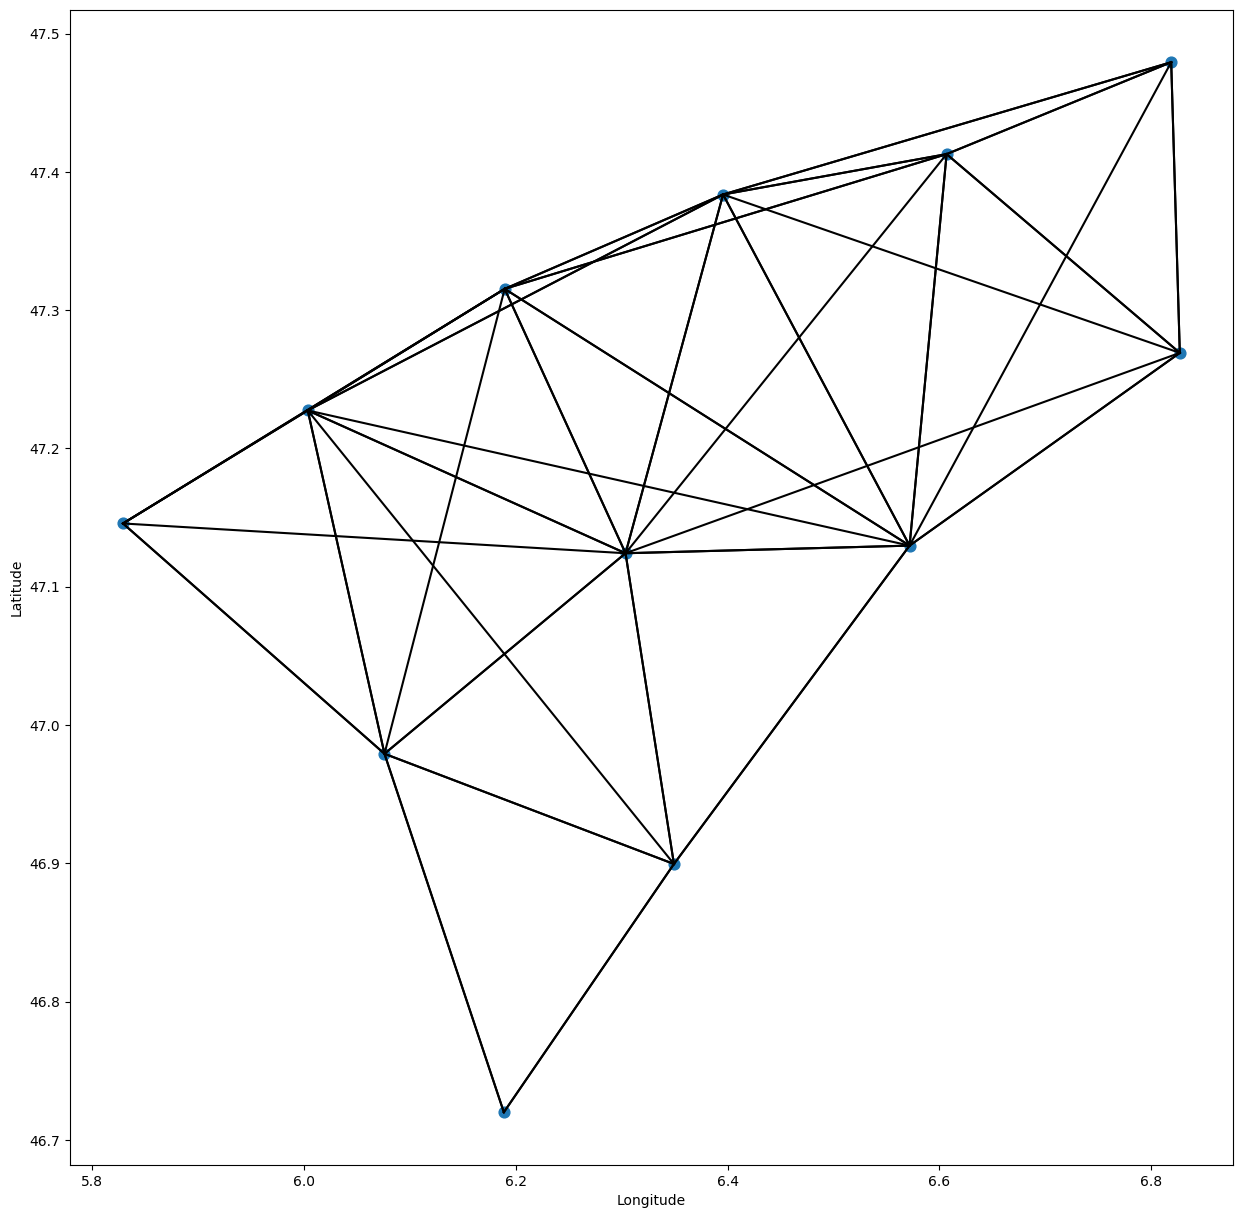

In [3]:
from graph_structure import GraphStructure
import geopandas as gpd

scale = 15
maxDist = 45
numNei = 6
geo = gpd.read_file('regions/regions.geojson')

graph = GraphStructure(scale, geo, maxDist, numNei)
graph._train_kmeans(doRaster=False, path=None, sinister='firepoint', resolution='2x2')
graph._create_nodes_list()
graph._create_edges_list()
graph._plot(graph.nodes[graph.nodes[:,3] == 25])